In [1]:
from IPython.display import display, Latex, Markdown as md
import numpy as np
import control as ctrl               
import math
import cmath
from lcapy import s
from lcapy.discretetime import z
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':[16,9],
                     'font.size': 22, 
                     'xaxis.labellocation': 'right',
                     'yaxis.labellocation': 'top'})

def tf_control_2_lcapy(tf):
    tfout = 0;
    temp = 0;
     
    num = tf.num[0][0];
    den = tf.den[0][0];
    
    if ctrl.isctime(tf):
        for i in range(len(num)):
            tfout += num[i]*(s**(len(num)-1-i));
        
        for i in range(len(den)):
            temp += den[i]*(s**(len(den)-1-i));
        tfout /= temp;
    else:
        for i in range(len(num)):
            tfout += num[i]*(z**(len(num)-1-i));
        
        for i in range(len(den)):
            temp += den[i]*(z**(len(den)-1-i));
        tfout /= temp;
            
    return tfout;

# Item a)

In [2]:
T = 0.2;
Gs = ctrl.tf([1], [1, 2]);
Gz = ctrl.c2d(Gs, T);
display(Latex("$G(s) \ =$"));
display(Latex(Gs._repr_latex_()));
display(Latex("$G(z) \ =$"));
display(Latex(Gz._repr_latex_()));

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
GHs = Gs*ctrl.tf([1], [1, 0]);
GHz = ctrl.c2d(GHs, T);
display(Latex("$GH(s) \ =$"));
display(Latex(GHs._repr_latex_()));
display(Latex("$GH(z) \ =$"));
display(Latex(GHz._repr_latex_()));

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
Fs = ctrl.tf([1], [1, 0]);
Fz = ctrl.c2d(Fs,T);
display(Latex("$F(s) \ =$"));
display(Latex(Fs._repr_latex_()));
display(Latex("$F(z) \ =$"));
display(Latex(Fz._repr_latex_()));

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [12]:
alpha = -0.6;
z1 = 0.496323533617+1j*0.369534620778;
numGHz = GHz.num[0][0];
denGHz = GHz.den[0][0];
numGc = [1, alpha];
phi2 = np.angle(np.polyval(numGHz,z1))+np.angle(np.polyval(numGc,z1))-np.angle(np.polyval(denGHz,z1));
phiB = -np.pi-phi2;
beta = (np.imag(z1)-np.real(z1)*np.tan(-phiB))/np.tan(-phiB);
Kc = 14.7581854147;
print("Pólo escolhido de acordo com os valores da frequência natural e fator de amortecimento = \n",z1);
print("Valor de alfa = \n", alpha);
print("Valor de beta = \n", beta);
print("Valor de Kc = \n", Kc);
Gc = ctrl.tf([Kc, Kc*alpha], [1, beta], T);
display(Latex("$G_{c}(z) \ =$"));
display(Latex(Gz._repr_latex_()));

Pólo escolhido de acordo com os valores da frequência natural e fator de amortecimento = 
 (0.496323533617+0.369534620778j)
Valor de alfa = 
 -0.6
Valor de beta = 
 -0.08306705602051423
Valor de Kc = 
 14.7581854147


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [13]:
FTMF = ctrl.minreal(Fz*(Gc*Gz)/(1+Gc*GHz));
display(Latex("$FTMF(z) \ =$"));
display(Latex(FTMF._repr_latex_()));
print("Pólos resultantes da FTMF = \n", FTMF.pole());

3 states have been removed from the model


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Pólos resultantes da FTMF = 
 [0.49632353+0.36953462j 0.49632353-0.36953462j 0.50129097+0.j        ]


## Os valores obtidos do pólos da FTMF coincidem com os valores desejados.

# Item b)

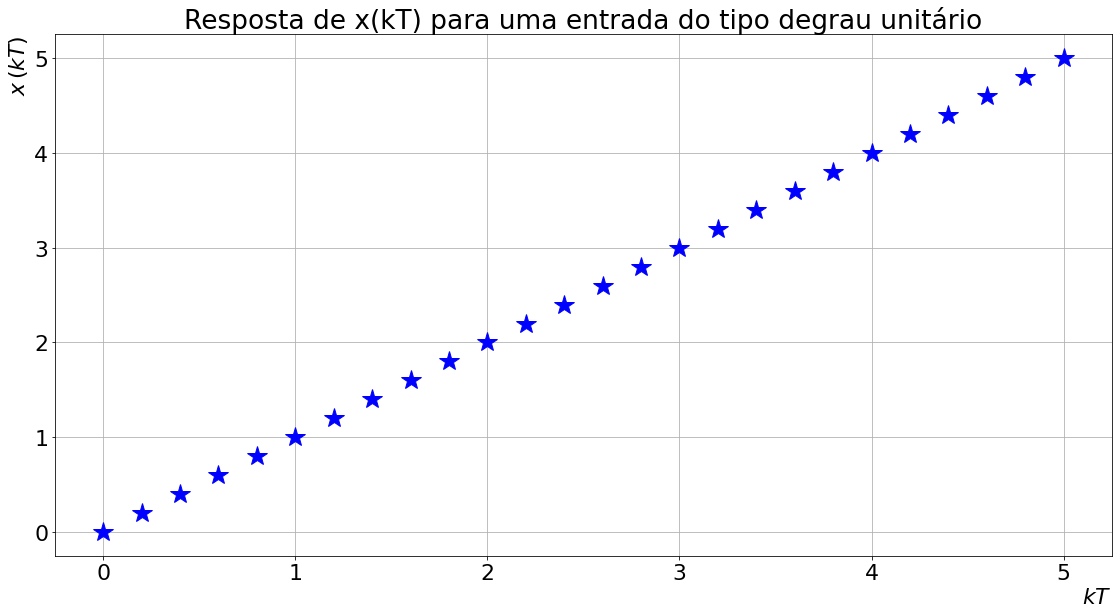

In [7]:
tfinal = 5;
Kmax = int(tfinal/T+1);
k = np.linspace(0, tfinal, Kmax);
r = np.heaviside(1,k);
x = np.zeros_like(k);

for i in range(1, Kmax):
    x[i] = x[i-1] + 0.2*r[i-1]; # Equação recursiva

plt.plot(k, x, 'b*', markersize=20);
#plt.xticks(np.arange(min(k), max(k)+1, T));
plt.title("Resposta de x(kT) para uma entrada do tipo degrau unitário");
plt.xlabel("$kT$");
plt.ylabel("$x \, (kT)$");
plt.grid();
plt.tight_layout();
plt.show();

# Item c)

In [8]:
Ez = ctrl.minreal(Fz/(1+Gc*GHz), verbose=False);
numEz = Ez.num[0][0];
denEz = Ez.den[0][0];
ess = (np.polyval(numEz, 1)/np.polyval(denEz, 1))  #  substituindo 1 em aux
print("Erro em regime permanente do sistema à entrada de um degrau unitário =\n",ess);

Erro em regime permanente do sistema à entrada de um degrau unitário =
 0.3106523323206714


# Item d)

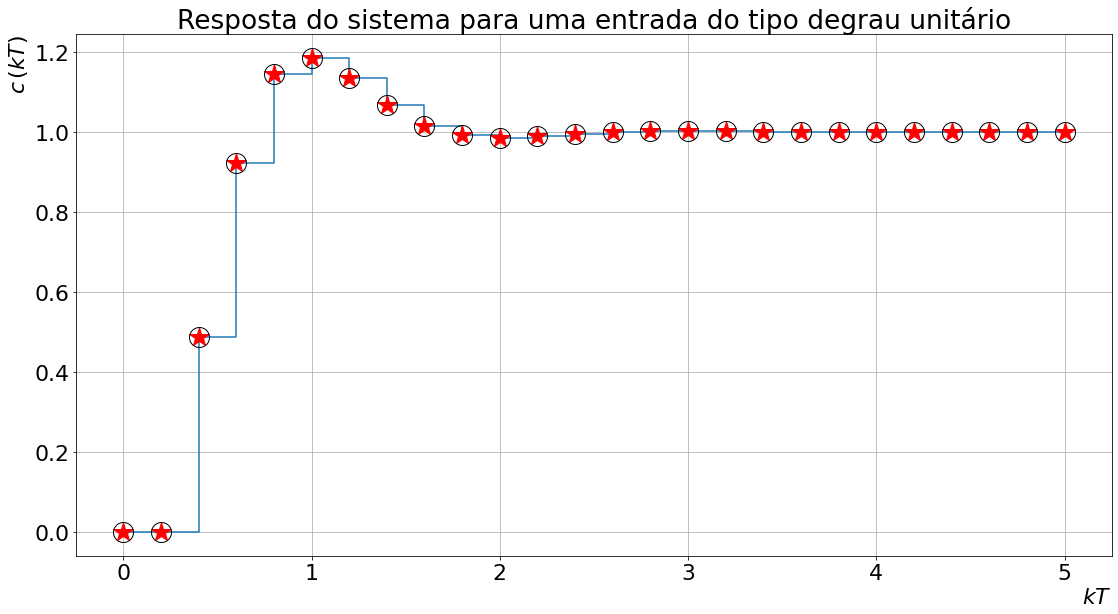

In [9]:
tfinal = 5;
Kmax = int(tfinal/T+1);
k = np.linspace(0, tfinal, Kmax);
r = np.heaviside(1,k);
x = np.zeros_like(k);
e = np.zeros_like(k);
u = np.zeros_like(k);
c = np.zeros_like(k);
v = np.zeros_like(k);

r0 = 0.2;
e0 = Kc;
e1 = Kc*alpha;
u0_bloco_C = -beta;
u0_bloco_G = Gz.num[0][0][0];
c0 = -Gz.den[0][0][1];
u0_bloco_GH = GHz.num[0][0][0];
u1_bloco_GH = GHz.num[0][0][1];
v0 = -GHz.den[0][0][1];
v1 = -GHz.den[0][0][2];

i = 1;
x[i] = r0*r[i-1] + x[i-1];
c[i] = u0_bloco_G*u[i-1] + c0*c[i-1];
v[i] = u0_bloco_GH*u[i-1] + v0*v[i-1];
e[i] = x[i] - v[i];
u[i] = e0*e[i] + e1*e[i-1] + u0_bloco_C*u[i-1];

for i in range(2, Kmax):
    x[i] = r0*r[i-1] + x[i-1];
    c[i] = u0_bloco_G*u[i-1] + c0*c[i-1];
    v[i] = u0_bloco_GH*u[i-1] + u1_bloco_GH*u[i-2] + v0*v[i-1] + v1*v[i-2];
    e[i] = x[i] - v[i];
    u[i] = e0*e[i] + e1*e[i-1] + u0_bloco_C*u[i-1];

y = ctrl.step_response(FTMF, k)[1];

plt.figure();
plt.plot(k, y, ds='steps-post');
plt.plot(k, y, 'r*', markersize=20);
plt.plot(k, c, 'ko', markerfacecolor='None', markersize=20);
plt.title("Resposta do sistema para uma entrada do tipo degrau unitário");
plt.xlabel("$kT$");
plt.ylabel("$c \, (kT)$");
plt.grid();
plt.tight_layout();
plt.show();

# Item e)

Amplitude máxima da ação de controle u(kT) = 
 3.611676224540316


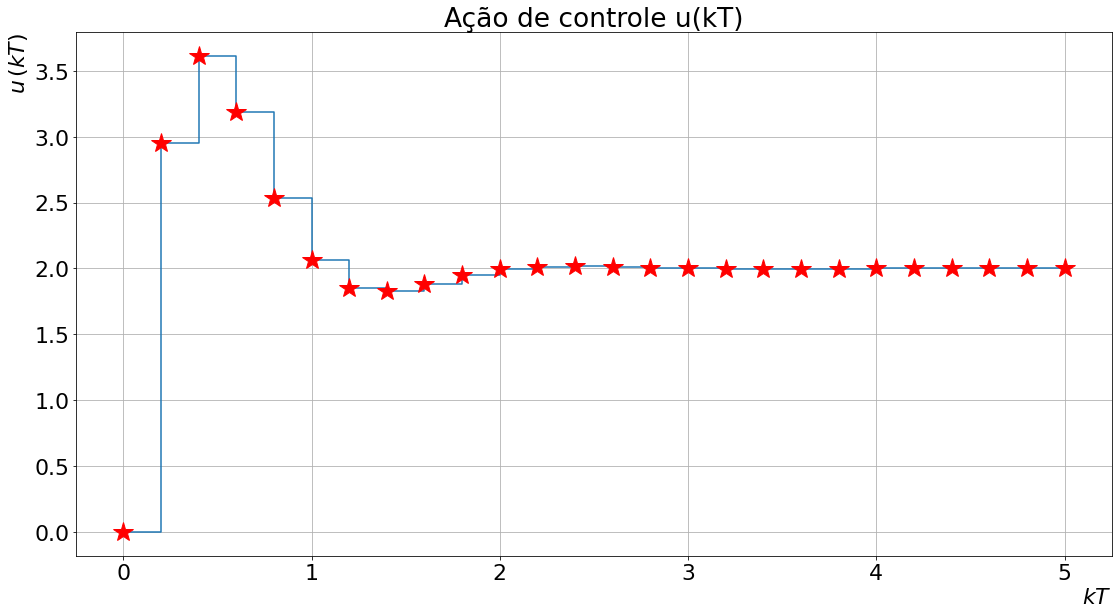

In [10]:
print("Amplitude máxima da ação de controle u(kT) = \n", max(u));

plt.figure();
plt.plot(k, u, ds='steps-post');
plt.plot(k, u, 'r*', markersize=20);
plt.title("Ação de controle u(kT)");
plt.xlabel("$kT$");
plt.ylabel("$u \, (kT)$");
plt.grid();
plt.tight_layout();
plt.show();